In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import os
path = 'D:/machine learning/Assignment 1/ex1/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


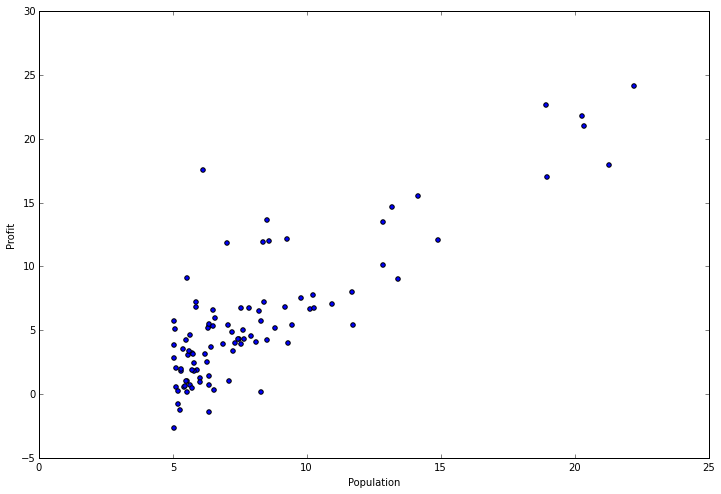

In [12]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.savefig('tanmay.png')

In [13]:
def computeCost(X,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [14]:
data.insert(0, 'Ones', 1)

In [25]:
#set X as training data and y as target variable
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]


In [45]:
theta = np.matrix(np.array([0,0]))

In [46]:
computeCost(X, y, theta)

32.072733877455676

In [50]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [57]:
alpha = 0.01
iters = 1000

In [58]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [60]:
computeCost(X, y, g)

4.5159555030789118

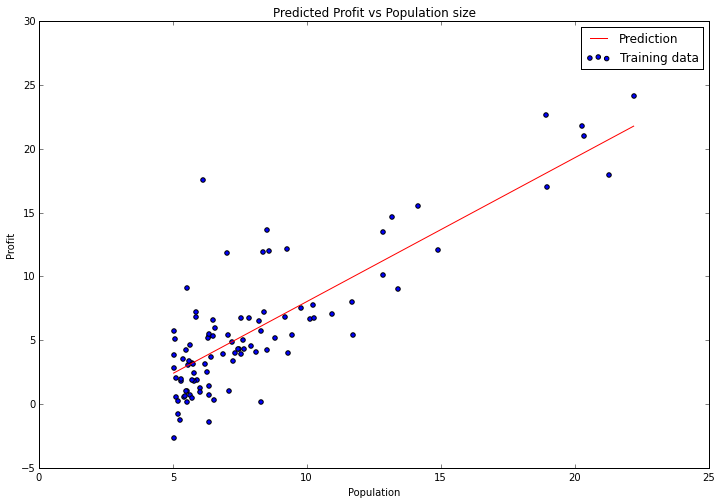

In [73]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + (g[0,1]*x)
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(x,f,'r',label = 'Prediction')
ax.scatter(data.Population, data.Profit, label = 'Training data')
ax.legend(loc=1)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population size')

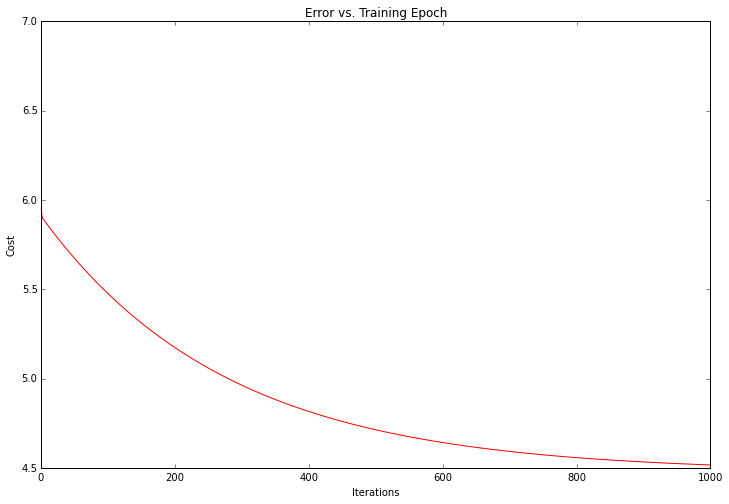

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [87]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

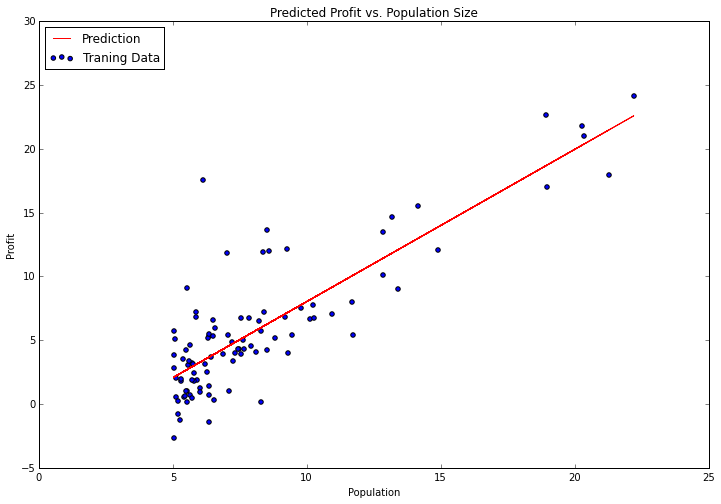

In [89]:
x = np.array(X[:, 1].A1)
f = model.predict(X).ravel()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')